In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import numpy as np


In [2]:
#Im going to call the function from dbconnection.py to conect to the database
from dbconnection import get_connection

cnx = get_connection()
cursor = cnx.cursor()

In [3]:
# hires by technology

query = """
SELECT t.TechnologyName,
       COUNT(*) AS TotalHires
FROM FactApplications f
JOIN DimTechnology t ON f.TechnologyID = t.TechnologyID
WHERE f.Hired = 1
GROUP BY t.TechnologyName
ORDER BY TotalHires DESC;
""" 

df = pd.read_sql(query, cnx)
print(df)


C:\Users\annie\AppData\Local\Temp\ipykernel_5724\2563789467.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


                             TechnologyName  TotalHires
0                          Game Development         519
1                                    DevOps         495
2                     System Administration         293
3                 Development - CMS Backend         284
4                  Adobe Experience Manager         282
5                   Database Administration         282
6                            Client Success         271
7                                  Security         266
8                    Development - Frontend         266
9                                  Mulesoft         260
10                                QA Manual         259
11                               Salesforce         256
12                            Data Engineer         255
13                    Development - Backend         255
14  Business Analytics / Project Management         255
15                  Development - FullStack         254
16                    Business Intelligence     

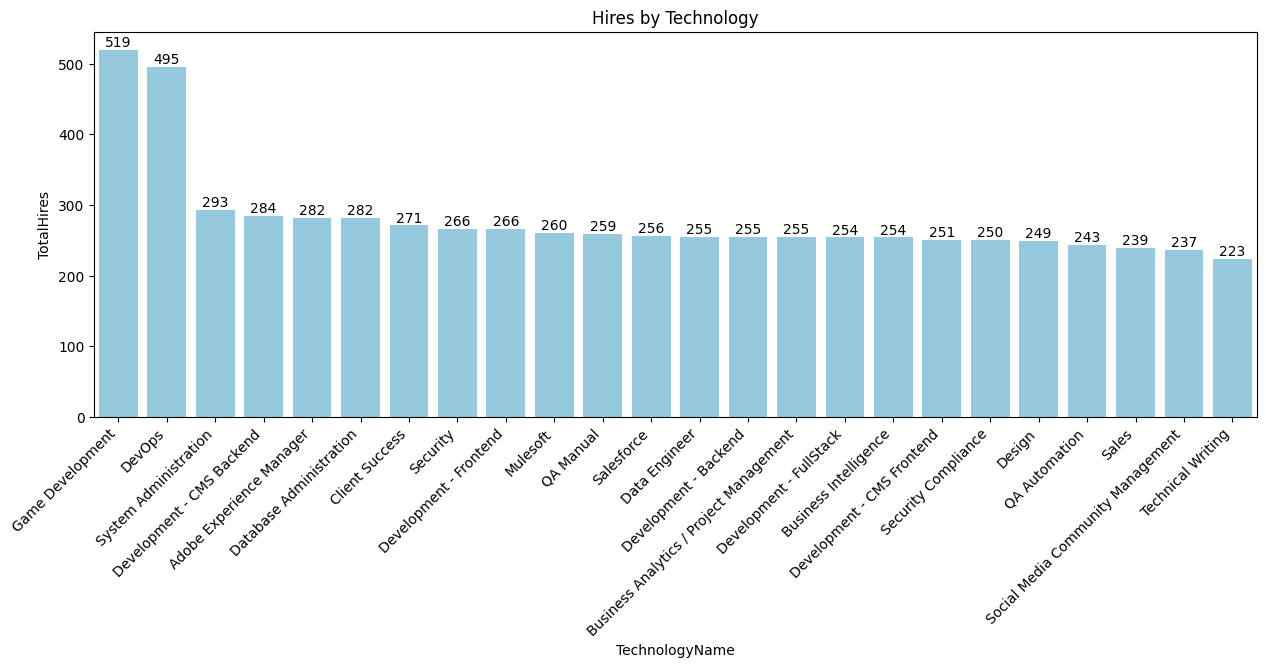

In [4]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data=df, x="TechnologyName", y="TotalHires", color="skyblue")

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  
        p.get_height() + 0.5,           
        int(p.get_height()),            
        ha='center', va='bottom'
    )
plt.title("Hires by Technology")
plt.xticks(rotation=45, ha='right')
plt.show()


In [5]:
#Hires by year 

query2 = """
SELECT d.Year,
       COUNT(*) AS TotalHires
FROM FactApplications f
JOIN DimDate d ON f.DateID = d.DateID
WHERE f.Hired = 1
GROUP BY d.Year
ORDER BY d.Year;
"""

df1 = pd.read_sql(query2, cnx)
print(df1)

   Year  TotalHires
0  2018        1409
1  2019        1524
2  2020        1485
3  2021        1485
4  2022         795


C:\Users\annie\AppData\Local\Temp\ipykernel_5724\3310215473.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(query2, cnx)


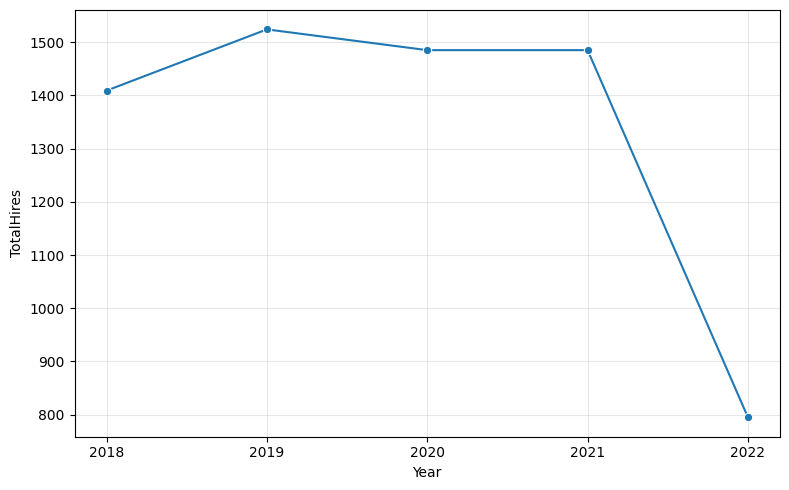

In [6]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df1, x="Year", y="TotalHires", marker="o")
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [7]:
#Hires by seniority level
query3 = """
SELECT s.SeniorityLevel,
       COUNT(*) AS TotalHires
FROM FactApplications f
JOIN DimSeniority s ON f.SeniorityID = s.SeniorityID
WHERE f.Hired = 1
GROUP BY s.SeniorityLevel
ORDER BY TotalHires DESC;
"""
df2 = pd.read_sql(query3, cnx)
print(df2)


  SeniorityLevel  TotalHires
0         Intern         985
1         Junior         977
2        Trainee         973
3      Architect         971
4         Senior         939
5           Lead         929
6      Mid-Level         924


C:\Users\annie\AppData\Local\Temp\ipykernel_5724\2662957258.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(query3, cnx)


C:\Users\annie\AppData\Local\Temp\ipykernel_5724\4274228039.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


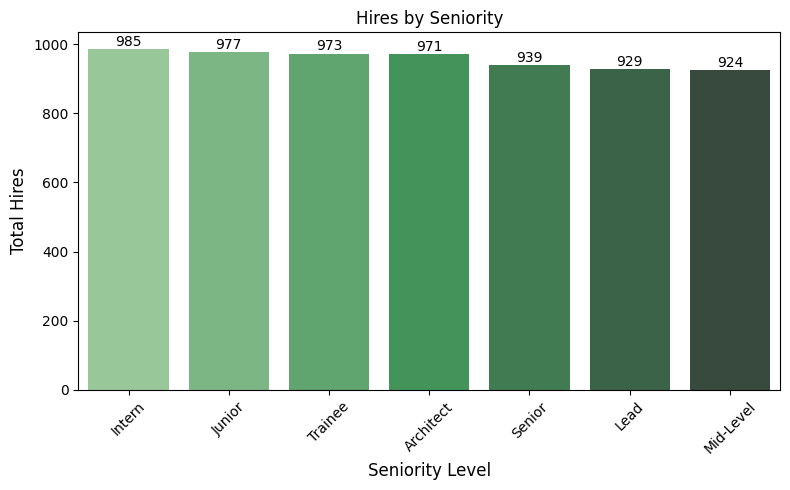

In [8]:
plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=df2,
    x="SeniorityLevel",
    y="TotalHires",
    palette="Greens_d",
)

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width()/2,   
        p.get_height() + 0.5,          
        int(p.get_height()),          
        ha="center", va="bottom", 
    )

plt.xticks(rotation=45)
plt.title("Hires by Seniority")
plt.xlabel("Seniority Level", fontsize=12)
plt.ylabel("Total Hires", fontsize=12)
plt.tight_layout()
plt.show()


In [9]:
#Hires by country over years (focus on USA, Brazil, Colombia, Ecuador).

query4 = """
SELECT 
    c.Country,
    d.Year,
    SUM(f.Hired) AS TotalHires
FROM FactApplications f
JOIN DimCountry c ON f.CountryID = c.CountryID
JOIN DimDate d ON f.DateID = d.DateID
WHERE c.Country IN ('United States of America', 'Brazil', 'Colombia', 'Ecuador', 'United States', 'United States of America')
GROUP BY c.Country, d.Year
ORDER BY c.Country, d.Year;

"""

df3 = pd.read_sql(query4, cnx)
print(df3)


                     Country  Year  TotalHires
0                     Brazil  2018         9.0
1                     Brazil  2019         7.0
2                     Brazil  2020         6.0
3                     Brazil  2021         7.0
4                     Brazil  2022         4.0
5                   Colombia  2018         7.0
6                   Colombia  2019         8.0
7                   Colombia  2020         8.0
8                   Colombia  2021         1.0
9                   Colombia  2022         1.0
10                   Ecuador  2018         1.0
11                   Ecuador  2019         3.0
12                   Ecuador  2020         8.0
13                   Ecuador  2021         5.0
14                   Ecuador  2022         3.0
15  United States of America  2018         5.0
16  United States of America  2019         3.0
17  United States of America  2020         4.0
18  United States of America  2021         8.0
19  United States of America  2022         5.0


C:\Users\annie\AppData\Local\Temp\ipykernel_5724\2139694716.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql(query4, cnx)


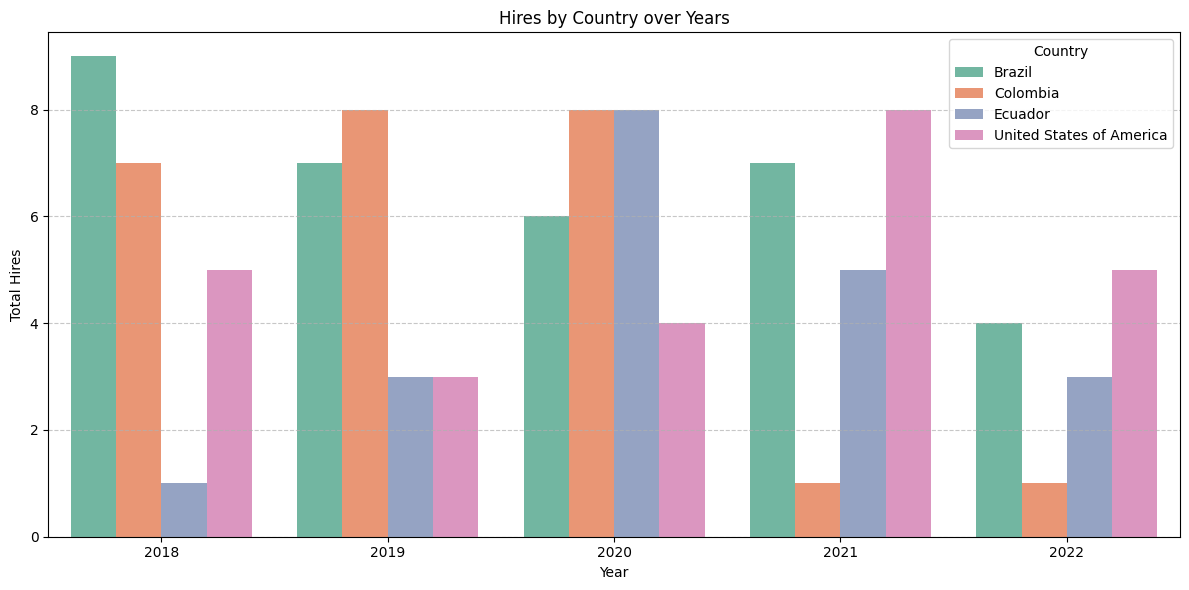

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=df3,
    x="Year", y="TotalHires", hue="Country",
    palette="Set2"
)


plt.title("Hires by Country over Years")
plt.xlabel("Year")
plt.ylabel("Total Hires")
plt.legend(title="Country")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [11]:
#Avarege Score by seniority level
query5 = """
SELECT s.SeniorityLevel,
       ROUND(AVG(f.CodeChallengeScore),2) AS AvgCodeScore,
       ROUND(AVG(f.TechnicalInterviewScore),2) AS AvgInterviewScore
FROM FactApplications f
JOIN DimSeniority s ON f.SeniorityID = s.SeniorityID
GROUP BY s.SeniorityLevel
ORDER BY AvgInterviewScore DESC;
"""
df4 = pd.read_sql(query5, cnx)
print(df4)

  SeniorityLevel  AvgCodeScore  AvgInterviewScore
0      Architect          4.99               5.04
1         Senior          4.99               5.04
2      Mid-Level          4.96               5.01
3        Trainee          4.99               5.00
4         Junior          5.08               4.99
5         Intern          5.01               4.97
6           Lead          4.96               4.97


C:\Users\annie\AppData\Local\Temp\ipykernel_5724\1230580819.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql(query5, cnx)


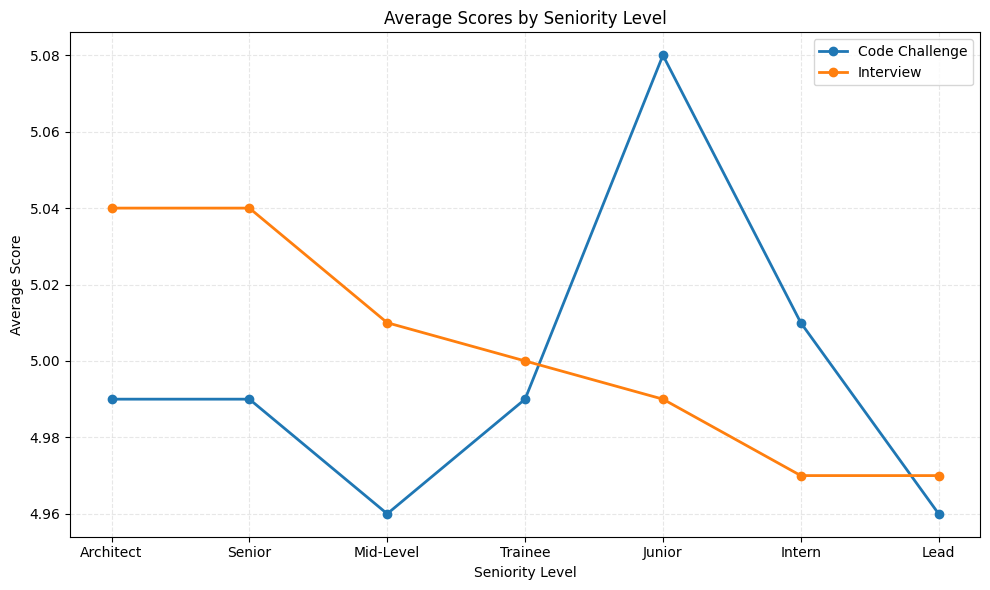

In [12]:
plt.figure(figsize=(10,6))
plt.plot(df4["SeniorityLevel"], df4["AvgCodeScore"], 
         marker="o", linewidth=2, label="Code Challenge")
plt.plot(df4["SeniorityLevel"], df4["AvgInterviewScore"], 
         marker="o", linewidth=2, label="Interview")

plt.title("Average Scores by Seniority Level")
plt.xlabel("Seniority Level")
plt.ylabel("Average Score")
plt.legend()
plt.grid(alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()


In [13]:
#Hires by expirence years 
query6 = """
SELECT 
    CASE 
        WHEN c.YOE BETWEEN 0 AND 2 THEN '0-2 years'
        WHEN c.YOE BETWEEN 3 AND 5 THEN '3-5 years'
        WHEN c.YOE BETWEEN 6 AND 10 THEN '6-10 years'
        WHEN c.YOE BETWEEN 11 AND 20 THEN '11-20 years'
        ELSE '20+ years'
    END AS ExperienceRange,
    COUNT(*) AS TotalHires
FROM FactApplications f
JOIN DimCandidate c ON f.CandidateID = c.CandidateID
WHERE f.Hired = 1
GROUP BY ExperienceRange
ORDER BY MIN(c.YOE);

"""
df5 = pd.read_sql(query6, cnx)
print(df5)

  ExperienceRange  TotalHires
0       0-2 years         574
1       3-5 years         652
2      6-10 years        1055
3     11-20 years        2205
4       20+ years        2212


C:\Users\annie\AppData\Local\Temp\ipykernel_5724\2891746243.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df5 = pd.read_sql(query6, cnx)


C:\Users\annie\AppData\Local\Temp\ipykernel_5724\1635115630.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


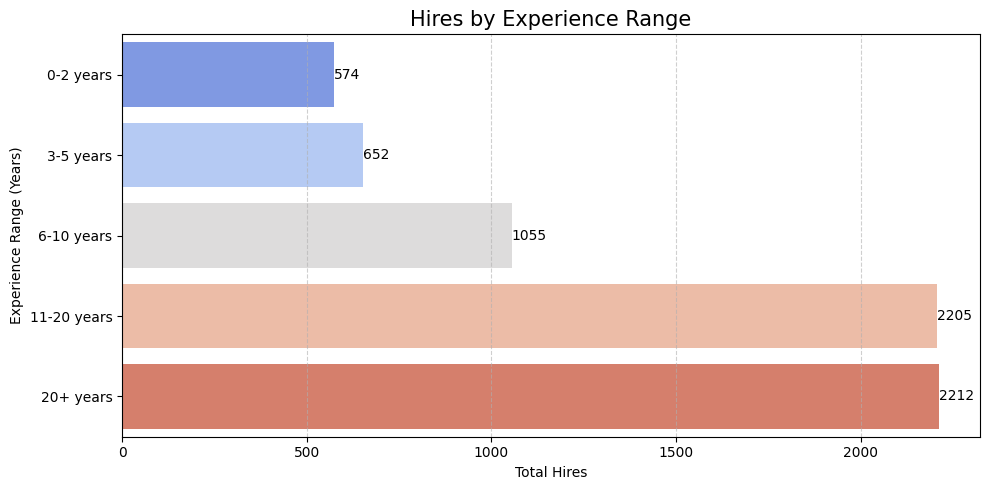

In [14]:
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=df5, 
    y="ExperienceRange", x="TotalHires", 
    palette="coolwarm"
)

for p in ax.patches:
    ax.text(
        p.get_width()+0.2, p.get_y() + p.get_height()/2,
        int(p.get_width()), ha="left", va="center",
    )

ax.xaxis.grid(True, linestyle="--", alpha=0.6)
plt.title("Hires by Experience Range", fontsize=15)
plt.xlabel("Total Hires")
plt.ylabel("Experience Range (Years)")
plt.tight_layout()
plt.show()

In [15]:
# cerrar conexión
cnx.close()